#### Data Visualization

In [ ]:
import pandas as pd
covid_data = pd.read_csv('C:/Users/olgav/IDE/SF_pandas/P13_data_visualization/data/covid_data.csv')
vaccinations_data = pd.read_csv('C:/Users/olgav/IDE/SF_pandas/P13_data_visualization/data/country_vaccinations.csv')
display(covid_data.head())
display(vaccinations_data.tail())
display(covid_data.shape)
display(vaccinations_data.shape)

#### Converting data

In [ ]:
covid_data = covid_data.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']  # active - ill now
# daily growth by category:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data.head())
covid_data.shape

#### Period of data in covid_data DataFrame

In [ ]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
display(covid_data['date'].min())
display(covid_data['date'].max())

#### Period of data in vaccination_data DataFrame

In [ ]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data['date'].min())
display(vaccinations_data['date'].max())

#### Tables merge

In [121]:
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])
display(covid_df['date'].min())
display(covid_df['date'].max())
covid_df.info()

Число строк:  86785
Число столбцов:  22


Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   iso_code                             18451 non-null  object        
 10  total_vacc

In [ ]:
covid_df['country'].value_counts()

#### Create features 'death_rate' and 'recovery_rate'

In [118]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recovery_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

#### Maximum death_rate for USA

In [119]:
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(),2)

7.19

#### Average rate of recovery in Russia

In [120]:
round(covid_df[covid_df['country'] == 'Russia']['recovery_rate'].mean(),2)

67.06

#### Visualization with Pandas

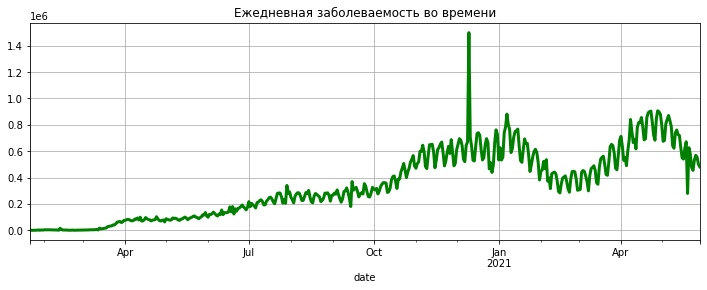

In [141]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    color = 'green',
    lw=3
);

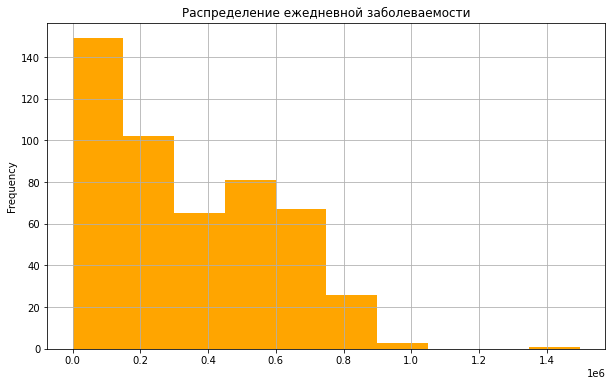

In [137]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'orange',
    bins=10
);

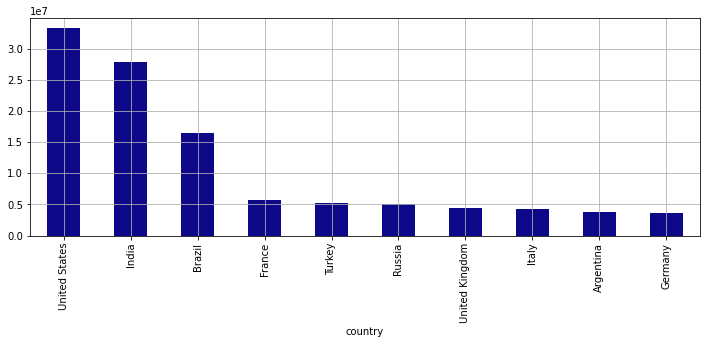

In [132]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

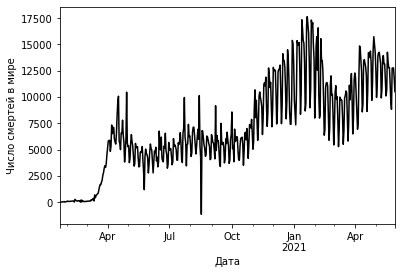

In [143]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', color='black', ylabel='Число смертей в мире');

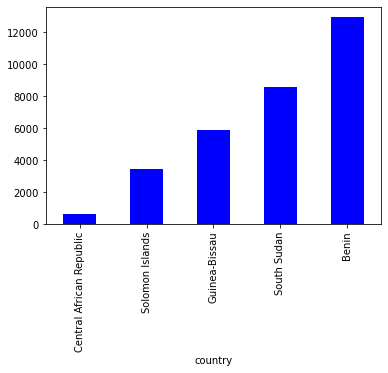

In [145]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar', color='blue');